EDA, DATA CLEANING & TRANSFORMATION

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load in the dataset--New York Airbnb dataset
NY_Airbnb = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\TDI Python\Capstone project\new_york_listings_2024.csv")

In [3]:
# Check out information about the dataset like; number of rows & columns, data types, missing values, etc.
NY_Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [4]:
# Display the number of unique values in each column.
NY_Airbnb.nunique()

id                                20758
name                               9836
host_id                           12449
host_name                          5815
neighbourhood_group                   5
neighbourhood                       221
latitude                          15382
longitude                         14477
room_type                             4
price                               785
minimum_nights                       69
number_of_reviews                   470
last_review                        1878
reviews_per_month                   783
calculated_host_listings_count       68
availability_365                    366
number_of_reviews_ltm               153
license                             879
rating                              162
bedrooms                             12
beds                                 17
baths                                17
dtype: int64

In [5]:
# Check for duplicates.
NY_Airbnb.duplicated().sum()

0

In [6]:
# view the data.
NY_Airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,24736896,Rental unit in New York · ★4.75 · 1 bedroom · ...,186680487,Henry D,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,...,2023-09-29,1.81,1,157,12,No License,4.75,1,1,1
20754,2835711,Rental unit in New York · ★4.46 · 1 bedroom · ...,3237504,Aspen,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,...,2023-07-01,0.48,1,0,1,No License,4.46,1,2,1
20755,51825274,Rental unit in New York · ★4.93 · 1 bedroom · ...,304317395,Jeff,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,...,2023-12-08,2.09,1,0,27,No License,4.93,1,1,1
20756,782661008019550832,Rental unit in New York · ★5.0 · 1 bedroom · 1...,163083101,Marissa,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,...,2023-09-17,0.91,1,363,7,No License,5.0,1,1,1


In [7]:
# Replace the ★ character and every sub-string character after it in the 'name' column with nothing.
NY_Airbnb['name'] = NY_Airbnb['name'].str.replace('★.*', '')

C:\Users\HP\AppData\Local\Temp\ipykernel_40724\3607869669.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  NY_Airbnb['name'] = NY_Airbnb['name'].str.replace('★.*', '')


In [8]:
# Rename 'neighbourhood_group' to 'borough', 'calculated_host_listings_count' column to 'number_of_host_listings' and '	last_review' to 'last_review_date'.
NY_Airbnb = NY_Airbnb.rename(columns= {'neighbourhood_group': 'borough',
                                      'calculated_host_listings_count': 'number_of_host_listings',
                                      'last_review': 'last_review_date'})

In [9]:
# Change the column 'last_review_date' data type to Date.
NY_Airbnb['last_review_date'] = pd.to_datetime(NY_Airbnb['last_review_date'], errors= 'coerce')

# Extract the year to create a new column from last_review_date column, for easy plotting of line chart with it.
NY_Airbnb['last_review_year'] = NY_Airbnb['last_review_date'].dt.year

In [10]:
# Replace 'No rating' & 'New' values with 0 in the rating column.
NY_Airbnb['rating'] = NY_Airbnb['rating'].str.replace('No rating', '0')
NY_Airbnb['rating'] = NY_Airbnb['rating'].str.replace('New', '0')
NY_Airbnb['rating'] = NY_Airbnb['rating'].astype('float64')         # Change 'rating' column data type to float.

In [11]:
# Create a column called 'other listing' where 'Studio' in 'bedrooms' column is equal to 'Studio' and other values are 'nill' to seperate studio from bedrooms.
NY_Airbnb['other_listing'] = np.where(NY_Airbnb['bedrooms'] == 'Studio', 'Studio', 'Nill')

In [12]:
# Replace 'Studio' values in bedrooms column to 0.
NY_Airbnb['bedrooms'] = NY_Airbnb['bedrooms'].str.replace('Studio', '0')
NY_Airbnb['bedrooms'] = NY_Airbnb['bedrooms'].astype('int64')          # Change 'bedrooms' data type to integer.

In [13]:
# Replace 'Not specified' values in baths column to 0.
NY_Airbnb['baths'] = NY_Airbnb['baths'].str.replace('Not specified', '0')

# Change 'baths' data type to float and drop values after decimal using np.floor() to round down. Then finally, change baths column to integer.
NY_Airbnb['baths'] = np.floor(NY_Airbnb['baths'].astype(float)).astype('int64')

In [14]:
# Create a column called 'host_listing_status' where avalaibility from 0 - 29days = Occassional, 30 - 180days = Seasonal, 181 & above days = Professional. 
NY_Airbnb['host_listing_status'] = np.where(NY_Airbnb['availability_365'] >= 181, 'Professional',
                                           np.where(NY_Airbnb['availability_365'] >= 30, 'Seasonal',
                                            'Occasional'))


In [15]:
# Create an Occupancy rate column.

# Estimate booked nights.
##NY_Airbnb['estimated_bookings'] = NY_Airbnb['reviews_per_month'] * 12       # Approximate yearly bookings.
##NY_Airbnb['booked_nights'] = NY_Airbnb['estimated_bookings'] * NY_Airbnb['minimum_nights']

# Calculate Occupancy rate
##NY_Airbnb['occupancy_rate'] = np.where(NY_Airbnb['availability_365'] > 0,    # Remove 0 from calculation to avoid infinity.
                                        ##(NY_Airbnb['booked_nights'] / NY_Airbnb['availability_365']) * 100,
                                        ##0)

# Approximate the values of occupancy rate to 2 decimal point.
##NY_Airbnb['occupancy_rate'] = NY_Airbnb['occupancy_rate'].round(2)

In [16]:
# Edit settings to display all columns of the data.
pd.set_option('display.max_columns', None)

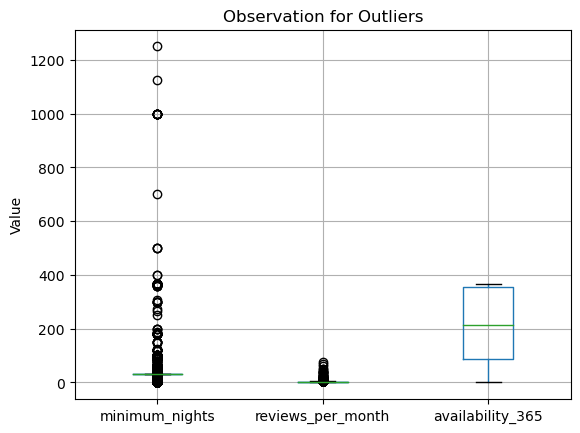

In [17]:
# Observe metrics for calculating occupancy rate, to find out the reason why some values are more than 100% occupancy rate.
NY_Airbnb.boxplot(column= ['minimum_nights', 'reviews_per_month', 'availability_365']) # Check for outliers.
plt.title('Observation for Outliers')
plt.ylabel('Value')
plt.show()

In [18]:
# Standardize the license column
NY_Airbnb['license'] = NY_Airbnb['license'].str.replace('Ose-strreg-', 'OSE-STRREG-')
NY_Airbnb['license'] = NY_Airbnb['license'].str.replace('ose-strreg-', 'OSE-STRREG-')

# Create a new column of licence category for easy grouping and visualization of OSE values.
NY_Airbnb['license_category'] = NY_Airbnb['license'].apply(lambda x: 'OSE License' if x.startswith('OSE') else x)

In [19]:
# Check out the column data types after transformation.
NY_Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       20758 non-null  int64         
 1   name                     20758 non-null  object        
 2   host_id                  20758 non-null  int64         
 3   host_name                20758 non-null  object        
 4   borough                  20758 non-null  object        
 5   neighbourhood            20758 non-null  object        
 6   latitude                 20758 non-null  float64       
 7   longitude                20758 non-null  float64       
 8   room_type                20758 non-null  object        
 9   price                    20758 non-null  float64       
 10  minimum_nights           20758 non-null  int64         
 11  number_of_reviews        20758 non-null  int64         
 12  last_review_date         20758 n

In [20]:
# Observe entire data after data cleaning and transformation.
NY_Airbnb.head(28)

,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review_date,reviews_per_month,number_of_host_listings,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,last_review_year,other_listing,host_listing_status,license_category
0,1312228,Rental unit in Brooklyn ·,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,30,3,2015-12-20,0.03,1,0,0,No License,5.00,1,1,0,2015,Nill,Occasional,No License
1,45277537,Rental unit in New York ·,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,30,9,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1,2023,Nill,Professional,No License
2,971353993633883038,Rental unit in New York ·,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,2,6,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1,2023,Nill,Professional,Exempt
3,3857863,Rental unit in New York ·,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,30,156,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1,2023,Nill,Professional,No License
4,40896611,Condo in New York ·,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,30,11,2023-12-03,0.24,133,335,3,No License,4.91,0,1,1,2023,Studio,Professional,No License
5,49584983,Rental unit in New York ·,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.759950,-73.992960,Entire home/apt,115.0,30,5,2023-07-29,0.16,139,276,2,No License,5.00,1,1,1,2023,Nill,Professional,No License
6,45457047,Rental unit in New York ·,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.767370,-73.987870,Entire home/apt,105.0,30,3,2022-08-31,0.10,139,364,0,No License,4.33,0,1,1,2022,Studio,Professional,No License
7,45847112,Rental unit in New York ·,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.765190,-73.990130,Entire home/apt,130.0,30,10,2023-05-30,0.26,139,295,2,No License,4.50,2,2,1,2023,Nill,Professional,No License
8,19280212,Rental unit in Brooklyn ·,2526182,Margaux,Brooklyn,Williamsburg,40.711530,-73.953120,Private room,90.0,30,19,2023-10-01,0.24,2,5,2,No License,4.79,1,1,1,2023,Nill,Occasional,No License
9,895681617796889995,Rental unit in Brooklyn ·,14251313,Kristin,Brooklyn,Sunset Park,40.658913,-73.989590,Entire home/apt,292.0,30,12,2023-10-19,1.71,1,365,12,No License,4.67,1,1,1,2023,Nill,Professional,No License


ANALYSIS & VISUALIZATIONS

KPI's

In [44]:
import plotly.graph_objects as go               # Import library to plot visuals, Eg: Card visuals.
from plotly.subplots import make_subplots

# Define KPI values.
total_listings = NY_Airbnb['id'].nunique()
licensed_listings = NY_Airbnb[NY_Airbnb['license_category'] == 'OSE License'].shape[0]
avg_price = NY_Airbnb['price'].mean()
total_hosts = NY_Airbnb['host_id'].nunique()
##avg_reviews = NY_Airbnb['number_of_reviews'].mean()
fully_available_listings = NY_Airbnb[NY_Airbnb['availability_365'] == 365].shape[0]

# Define the most common room type KPI.
room_counts = NY_Airbnb['room_type'].value_counts()
most_common_room = room_counts.idxmax()
most_common_room_count = room_counts.max()

# Create a grid KPI layout for the cards.
fig= make_subplots(
    rows= 2, cols= 3, 
    ##subplot_titles= ['Total Listings', 'Licensed Listings', 'Avg Price ($)', 
                     ##'Total Hosts', 'Fully Available Listings', 'Most Common Room'],      # Having this with each individual card titles creates double titles.
    specs= [[{'type': 'indicator'}, {'type': 'indicator'}, {'type': 'indicator'}],
            [{'type': 'indicator'}, {'type': 'indicator'}, {'type': 'indicator'}]]
)

# Create custom colors.
background_color = '#FDFFFC'
title_color = '#132A13'
number_color = '#A7C957'

# Add indicators (cards) with custom colors.
fig.add_trace(go.Indicator(
    mode= 'number',
    value= total_listings,
    title= {'text': 'Total Listings', 'font': {'color': title_color}},
    number= {'font': {'size': 50, 'color': number_color}}),
    row= 1, col= 1)                                                           # Card visual for Total listings.

fig.add_trace(go.Indicator(
    mode= 'number',
    value= licensed_listings,
    title= {'text': 'Licensed Listings', 'font': {'color': title_color}},
    number= {'font': {'size': 50, 'color': number_color}}),
    row= 1, col= 2)                                                          # Card visual for Licensed listings.

fig.add_trace(go.Indicator(
    mode= 'number',
    value= avg_price,
    title= {'text': 'Avg Price ($)', 'font': {'color': title_color}},
    number= {'font': {'size': 50, 'color': number_color}}),
    row= 1, col= 3)                                                          # Card visual for Average price.

fig.add_trace(go.Indicator(
    mode= 'number',
    value= total_hosts,
    title= {'text': 'Total Hosts', 'font': {'color': title_color}},
    number= {'font': {'size': 50, 'color': number_color}}),
    row= 2, col= 1)                                                          # Card visual for Total hosts.

##fig.add_trace(go.Indicator(
    ##mode= 'number',
    ##value= avg_reviews,
    ##title= {'text': 'Avg Reviews'}))                                        # Card visual for Average reviews.

fig.add_trace(go.Indicator(
    mode= 'number',
    value= fully_available_listings,
    title= {'text': 'Fully Available Listings', 'font': {'color': title_color}},
    number= {'font': {'size': 50, 'color': number_color}}),
    row= 2, col= 2)                                                         # Card visual for Fully available listings.

fig.add_trace(go.Indicator(
    mode= 'number',
    value= most_common_room_count,
    title= {'text': f"Most Common Room: {most_common_room}", 'font': {'color': title_color}},
    number= {'font': {'size': 50, 'color': number_color}}),
    row= 2, col= 3)                                                          # Card visual for Most common room.

# Adjust layout settings
fig.update_layout(
    height= 400, 
    width= 900,
    paper_bgcolor= background_color)

fig.show()                          # Display visuals.

Location & Geographic Insights

<Figure size 1000x600 with 0 Axes>

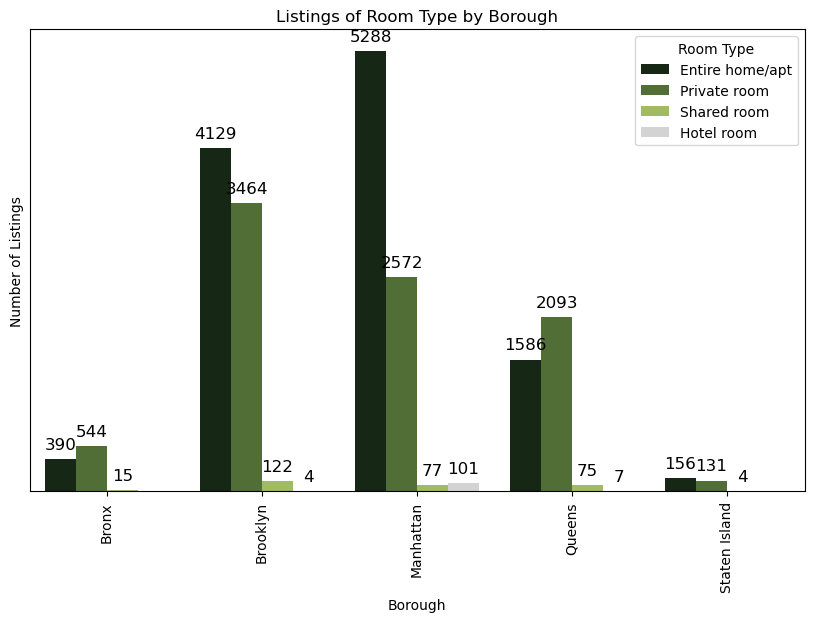

In [46]:
# Number of listings by room type, for each borough. 
sum_of_listings = NY_Airbnb.groupby(['borough','room_type'])['number_of_host_listings'].count().reset_index()
custom_color = ['#132A13', '#4F772D', '#A7C957', '#D3D3D3']         # Create custom color for chart.
plt.figure(figsize= (10, 6))
ax = sns.barplot(x= 'borough',
            y= 'number_of_host_listings',
            hue= 'room_type',
            data= sum_of_listings,
            palette= custom_color,
            errorbar= None)

# Add values above each bars
for bars in ax.containers:
    ax.bar_label(bars, fmt= '%.0f', label_type= 'edge', padding= 5, fontsize= 12, color= 'black')

# Hide Y-axis values
ax.set_yticks([])

# Customize chart
plt.title('Listings of Room Type by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Listings')
plt.legend(title= 'Room Type')
plt.xticks(rotation= 90)

plt.show()

In [23]:
# Install the folium package to display interactive map
##%pip install folium   

In [24]:
# Check if folium is installed
##!pip show folium

In [34]:
# Display the average price of listings in each borough.

# Import the folium library to create interactive maps
import folium 

# Group by borough to calculate average price, latitude and longitude.
borough_avg_price = NY_Airbnb.groupby('borough', as_index= False).agg({
                                                                    'price': 'mean',
                                                                    'latitude': 'mean',
                                                                    'longitude': 'mean'})

# Create a folium map for each borough in New York.
borough_map = folium.Map(location= [40.7128, -74.0060], zoom_start= 11)

# Add markers for each borough with average prive.              # NB: This is another method of plotting the map.
#for _, row in borough_calc.iterrows():
    #borough = row['borough']
    #avg_price = row['price']
    #lat, lon = row['latitude'], row['longitude']

    #folium.Marker(
        #location = [lat, lon],
        #popup = f"{borough}: ${avg_price: 2f}",         # Show price when clicked.
        #tooltip = f"Avg Price: ${avg_price: 2f}",       # Show price when you hover.
        #icon = folium.Icon(color= "blue", icon= "info-sign")
    #).add_to(borough_map)

# Add circle markers for each borough
for _, row in borough_avg_price.iterrows():
    folium.CircleMarker(
        location= [row['latitude'], row['longitude']],
        radius= 10,             # Adjust price.
        color= 'green',
        fill= True,
        fill_color= 'green',
        fill_opacity= 0.6,
        popup= f"{row['borough']}: ${row['price']:.2f}"         # Show price when clicked.
    ).add_to(borough_map)

# Display map.
borough_map

License Distribution

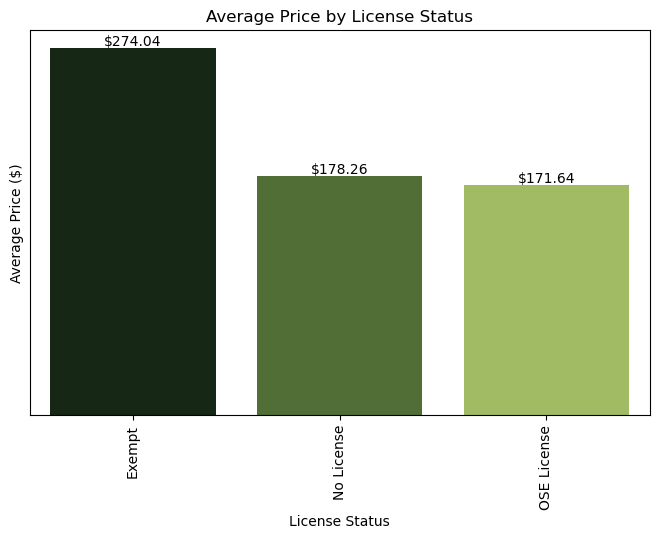

In [26]:
# Group abd calculate the average price by license.
avg_price_by_license = NY_Airbnb.groupby('license_category')['price'].mean().reset_index()
avg_price_by_license['price'] = avg_price_by_license['price'].round(2)  # Approximate to 2 decimal place for readability.


# Create a chart of the average price by license_category.
custom_color = ['#132A13', '#4F772D', '#A7C957']         # Create custom color for chart.
plt.figure(figsize= (8, 5))
sns.barplot(data= avg_price_by_license,
            x= 'license_category',
            y= 'price',
            palette= custom_color)

# Customize chart to add labels and title.
plt.title('Average Price by License Status')
plt.xlabel('License Status')
plt.ylabel('Average Price ($)')
plt.xticks(rotation= 90)

# Hide Y-axis values.
plt.yticks([])

# Show values on top each bars.
for index, row in avg_price_by_license.iterrows():
    plt.text(index, row['price'], f"${row['price']:.2f}", ha= 'center', va= 'bottom')

plt.show()

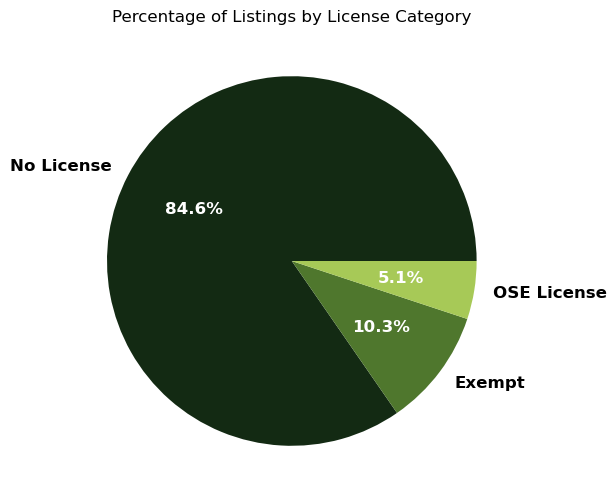

In [27]:
# Calculate the percentage of listings for each license category.
license_counts = NY_Airbnb['license_category'].value_counts(normalize = True) * 100

# Create a chart to show the percentage of listings by license category.
custom_color = ['#132A13', '#4F772D', '#A7C957']         # Create custom color for chart.
plt.figure(figsize= (6, 6))
wedges, texts, autotexts = plt.pie(license_counts,
                                    labels= license_counts.index,               # Keep category labels visible.
                                    autopct= lambda p: f"{p:.1f}%", 
                                    colors= sns.color_palette(custom_color),
                                    textprops= {'fontsize': 12, 'fontweight': 'bold'})  # Keep labels black.
# Make only percentage values color white.
for autotext in autotexts:
    autotext.set_color('white')

# Customize & display chart.
plt.title('Percentage of Listings by License Category')
plt.show()

Room & Property Insight

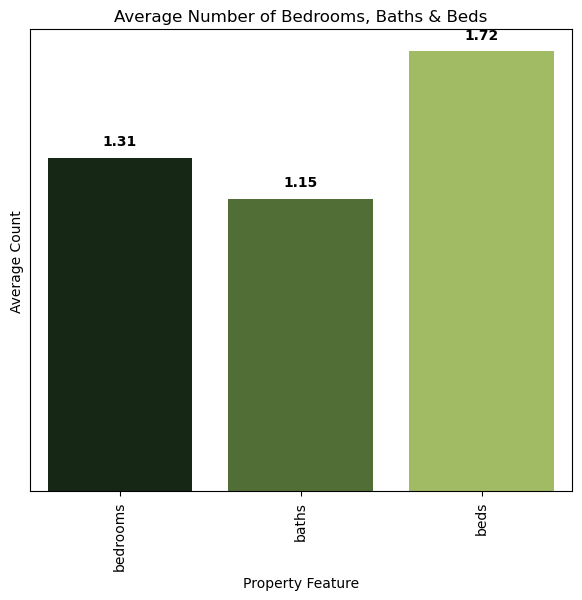

In [28]:
# Calculate the average number of bedrooms, baths and beds.
avg_bedrooms_bath_bed = NY_Airbnb[['bedrooms', 'baths', 'beds']].mean()

# Create a chart that shows average number of bedrooms, baths and beds.
custom_color = ['#132A13', '#4F772D', '#A7C957']         # Create custom color for chart.
plt.figure(figsize= (7, 6))
sns.barplot(x= avg_bedrooms_bath_bed.index,
            y= avg_bedrooms_bath_bed.values,
            palette= custom_color)

# Customize chart to add labels and title.
plt.title('Average Number of Bedrooms, Baths & Beds')
plt.xlabel('Property Feature')
plt.ylabel('Average Count')
plt.xticks(rotation= 90)

# Hide Y-axis values.
plt.yticks([])

# Show values on bars.
for i, v in enumerate(avg_bedrooms_bath_bed):
    plt.text(i, v + 0.05, f"{v:.2f}", ha= 'center', color= 'black', fontweight= 'bold')

plt.show()

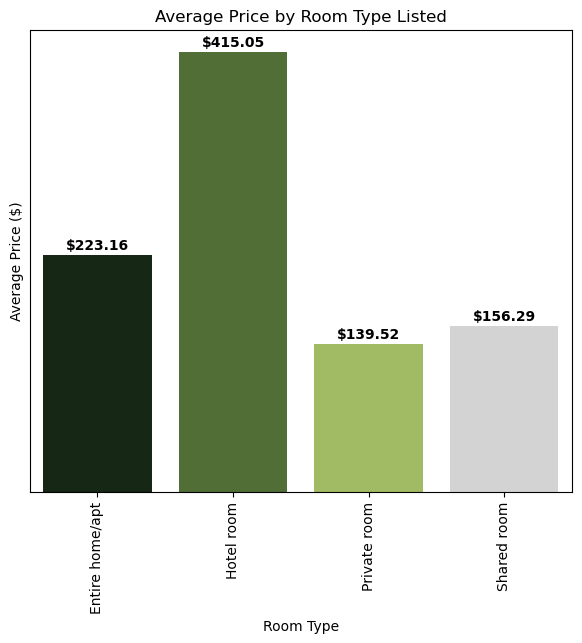

In [29]:
# Calculate the average price for each property type listed.
avg_price_by_room = NY_Airbnb.groupby('room_type')['price'].mean().reset_index()

# Create a chart that shows the average price for each property type listing.
custom_color = ['#132A13', '#4F772D', '#A7C957', '#D3D3D3']         # Create custom color for chart.
plt.figure(figsize= (7, 6))
sns.barplot(data= avg_price_by_room,
            x= 'room_type',
            y= 'price',
            palette= custom_color)

# Customize chart to add labels and title.
plt.title('Average Price by Room Type Listed')
plt.xlabel('Room Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation= 90)

# Hide Y-axis values.
plt.yticks([])

# Show values on bars.
for i, v in enumerate(avg_price_by_room['price']):
    plt.text(i, v + 5, f"${v:.2f}", ha= 'center', color= 'black', fontweight= 'bold')

plt.show()

Guest Engagement/Review

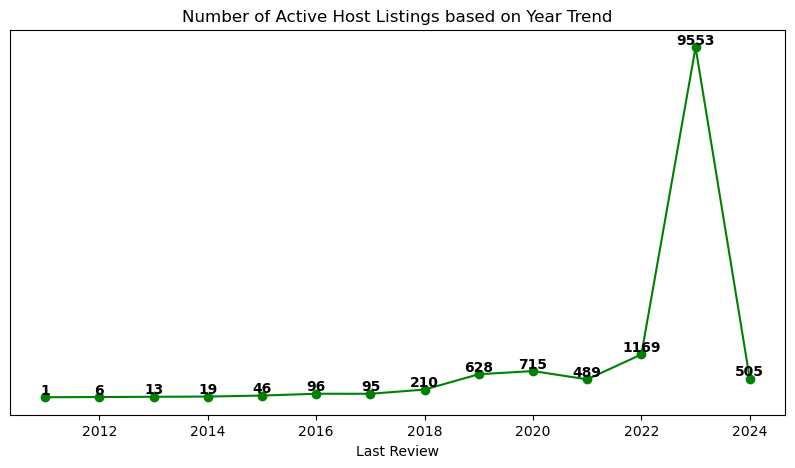

In [39]:
# Find out the number of active hosts based on each year through their last review year.
unique_host_by_LastReview_year = NY_Airbnb.groupby('last_review_year')['host_id'].nunique().reset_index()

# Plot a chart that shows the number of active hosts by their last review year.
plt.figure(figsize= (10, 5))
plt.plot(unique_host_by_LastReview_year['last_review_year'],
        unique_host_by_LastReview_year['host_id'],
        marker= 'o',
        linestyle= '-',
        color= 'green')

# Customize chart to add labels and title.
plt.title('Number of Active Host Listings based on Year Trend')
plt.xlabel('Last Review')
##plt.ylabel('Number of Hosts')
##plt.xticks(unique_host_by_LastReview_year['last_review_year'])         # This ensures all year is displayed at the X-axis.
##plt.grid(True)                                                        # Adds grid lines to the line chart.

# Hide Y-axis values.
plt.yticks([])

# Show values on points----Loop through data points and add values displayed as text above each point.
for x, y in zip(unique_host_by_LastReview_year['last_review_year'], unique_host_by_LastReview_year['host_id']):
    plt.text(x, y, str(y), ha= 'center', va= 'bottom', fontsize= 10, fontweight= 'bold', color= 'black')

plt.show()

Listing Trend

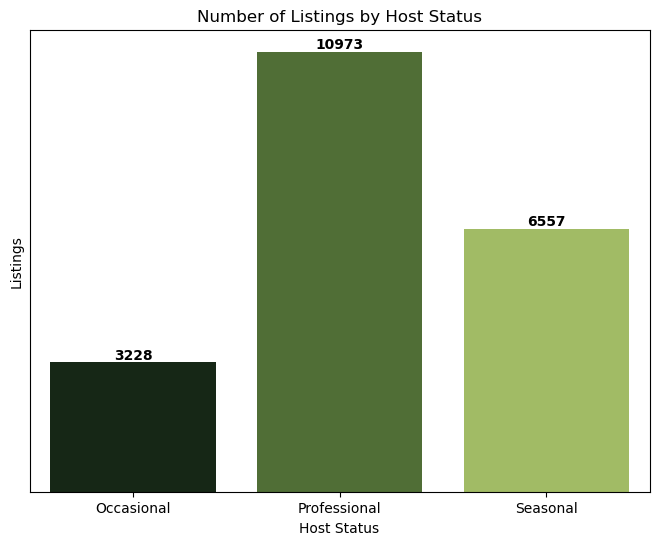

In [31]:
# Calculate the number of listings for each host status.
number_of_listings_by_host_status = NY_Airbnb.groupby('host_listing_status')['number_of_host_listings'].count().reset_index()

# Create a chart that shows the number of listings by host status
custom_color = ['#132A13', '#4F772D', '#A7C957']         # Create custom color for chart.
plt.figure(figsize= (8, 6))
sns.barplot(data= number_of_listings_by_host_status,
            x= 'host_listing_status',
            y= 'number_of_host_listings',
            palette= custom_color)

# Customize chart to add labels and title.
plt.title('Number of Listings by Host Status')
plt.xlabel('Host Status')
plt.ylabel('Listings')
##plt.xticks(rotation= 90)

# Hide Y-axis values.
plt.yticks([])

# Show values on bars.
for index, row in number_of_listings_by_host_status.iterrows():
    plt.text(index, row['number_of_host_listings'] + 2, str(row['number_of_host_listings']),
              ha= 'center', va= 'bottom', fontsize= 10, fontweight= 'bold', color= 'black')

plt.show()


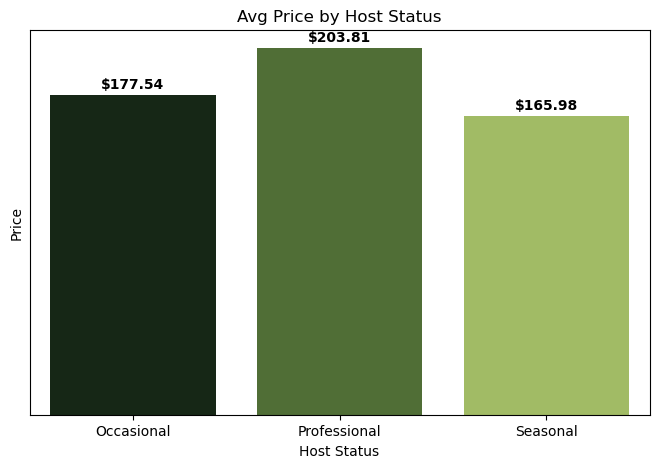

In [32]:
# Calculate the average price based on host status.
avg_price_by_host_status = NY_Airbnb.groupby('host_listing_status')['price'].mean().reset_index()

# Create a chart that shows the average price by host status.
custom_color = ['#132A13', '#4F772D', '#A7C957']         # Create custom color for chart.
plt.figure(figsize= (8, 5))
sns.barplot(data= avg_price_by_host_status,
            x= 'host_listing_status',
            y= 'price',
            palette= custom_color)

# Customize chart to add labels and title.
plt.title('Avg Price by Host Status')
plt.xlabel('Host Status')
plt.ylabel('Price')
##plt.xticks(rotation= 90)

# Hide Y-axis values.
plt.yticks([])

# Show values on bars.
for index, row in avg_price_by_host_status.iterrows():
    plt.text(index, row['price'] + 2, f"${row['price']:.2f}",
              ha= 'center', va= 'bottom', fontsize= 10, fontweight= 'bold', color= 'black')

plt.show()

Relationship Between Variables

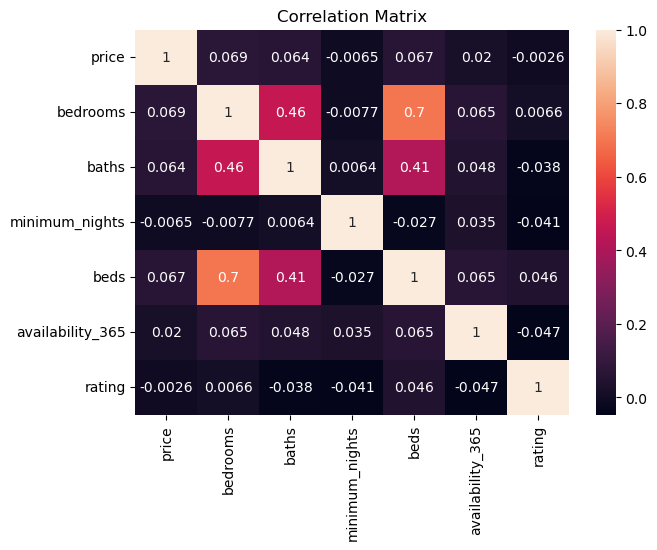

In [33]:
# Observe the correlation between price & bedrooms, price & availability, and other numeric variables of the data.
matrix_columns = NY_Airbnb[['price', 'bedrooms', 'baths', 'minimum_nights', 'beds', 'availability_365', 'rating']]
plt.figure(figsize= (7,5))
sns.heatmap(matrix_columns.corr(), annot= True)          # Create correlation heatmap.

# Customize heatmap.
plt.title('Correlation Matrix')

plt.show()